## Importing libraries

In [1]:
from visualizations import show_results, get_experiment_results, get_column_names, verify_integrity
import pandas as pd
import os

## setting up expriment related variables

#### important variable names

In [2]:
columns = ["algo", "experiment_id", "dataset", "seed", "generation", "training_fitness", "timing", "pop_node_count"]
logger_name = "final_concrete-size.csv"
dataset = "concrete"
log_level = 1

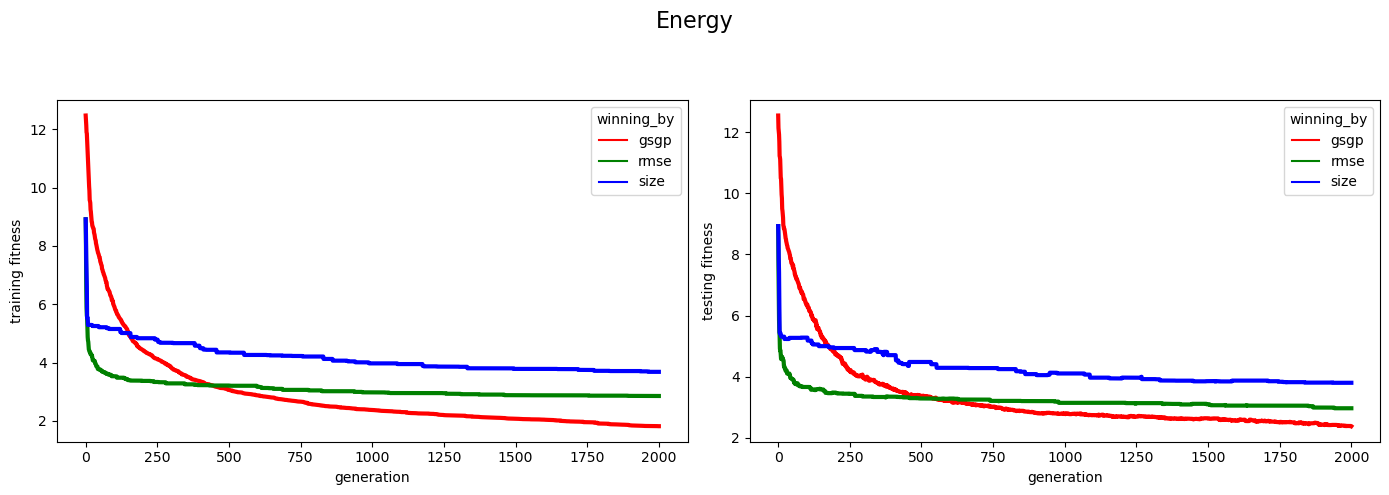

generation  winning_by
0           gsgp          12.472655
            rmse           8.913539
            size           8.913539
1           gsgp          12.321833
            rmse           7.967624
                            ...    
1999        rmse           2.851584
            size           3.680085
2000        gsgp           1.815491
            rmse           2.851584
            size           3.680085
Name: training_fitness, Length: 6003, dtype: float64
generation  winning_by
0           gsgp          12.543009
            rmse           8.927380
            size           8.927380
1           gsgp          12.131944
            rmse           7.540915
                            ...    
1999        rmse           2.972122
            size           3.805296
2000        gsgp           2.385888
            rmse           2.972122
            size           3.805296
Name: test_fitness, Length: 6003, dtype: float64


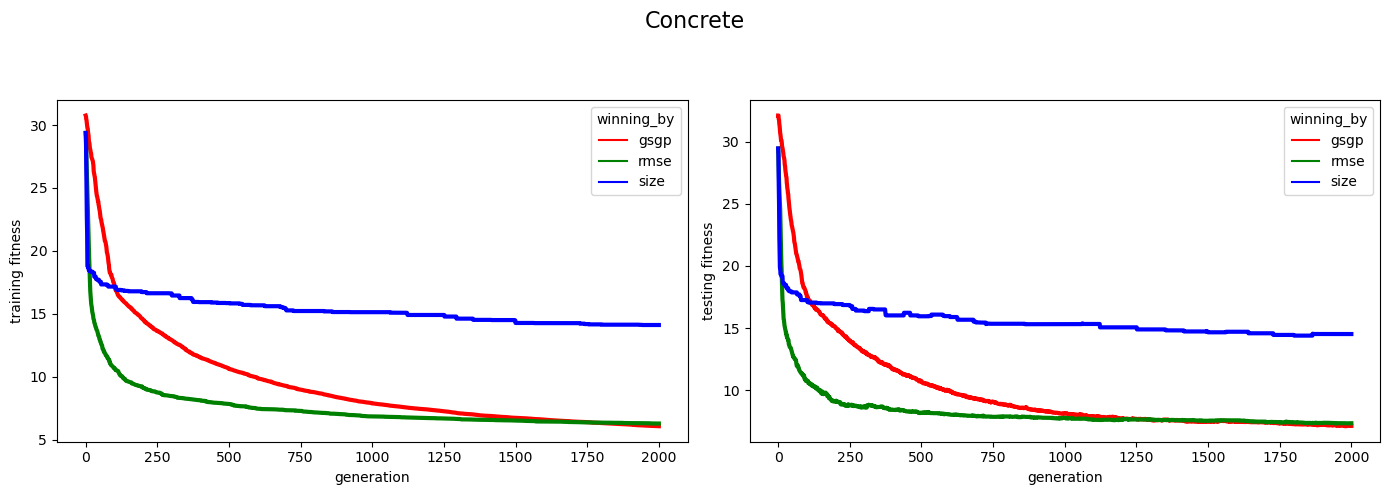

generation  winning_by
0           gsgp          30.751607
            rmse          29.371054
            size          29.371054
1           gsgp          30.687922
            rmse          28.734518
                            ...    
1999        rmse           6.303677
            size          14.123927
2000        gsgp           6.092232
            rmse           6.303677
            size          14.123927
Name: training_fitness, Length: 6003, dtype: float64
generation  winning_by
0           gsgp          32.103046
            rmse          29.451572
            size          29.451572
1           gsgp          32.103413
            rmse          28.462548
                            ...    
1999        rmse           7.337557
            size          14.521454
2000        gsgp           7.131194
            rmse           7.343408
            size          14.521454
Name: test_fitness, Length: 6003, dtype: float64


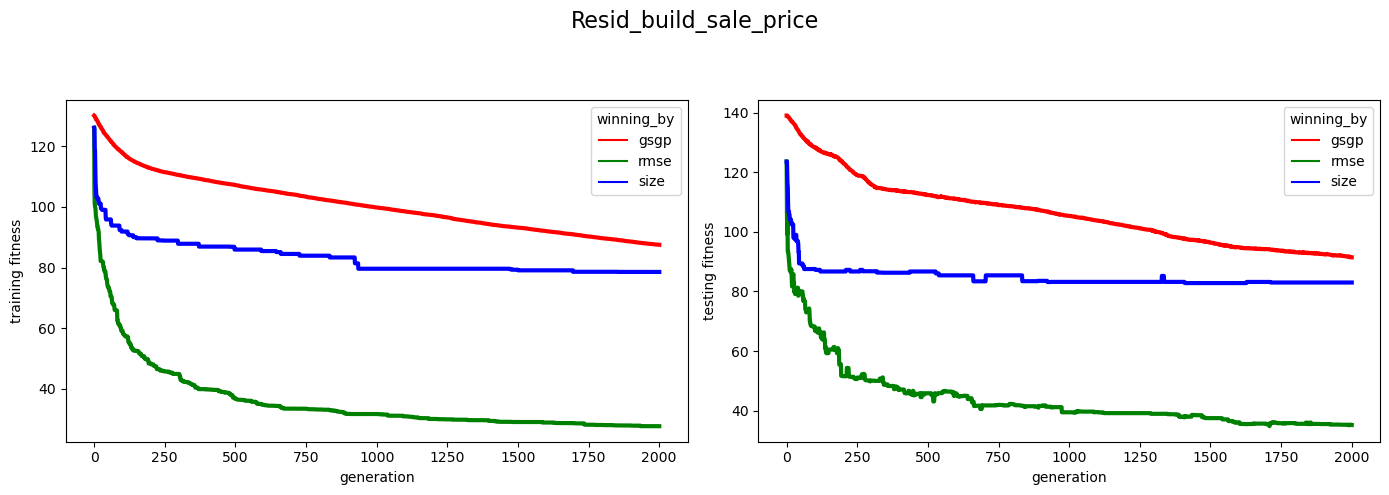

generation  winning_by
0           gsgp          130.195419
            rmse          126.156601
            size          126.156601
1           gsgp          130.119225
            rmse          105.004585
                             ...    
1999        rmse           27.592186
            size           78.534454
2000        gsgp           87.507000
            rmse           27.592186
            size           78.534454
Name: training_fitness, Length: 6003, dtype: float64
generation  winning_by
0           gsgp          139.070976
            rmse          123.629810
            size          123.629810
1           gsgp          139.070976
            rmse          106.833515
                             ...    
1999        rmse           35.197523
            size           83.009216
2000        gsgp           91.465141
            rmse           35.183725
            size           83.009216
Name: test_fitness, Length: 6003, dtype: float64


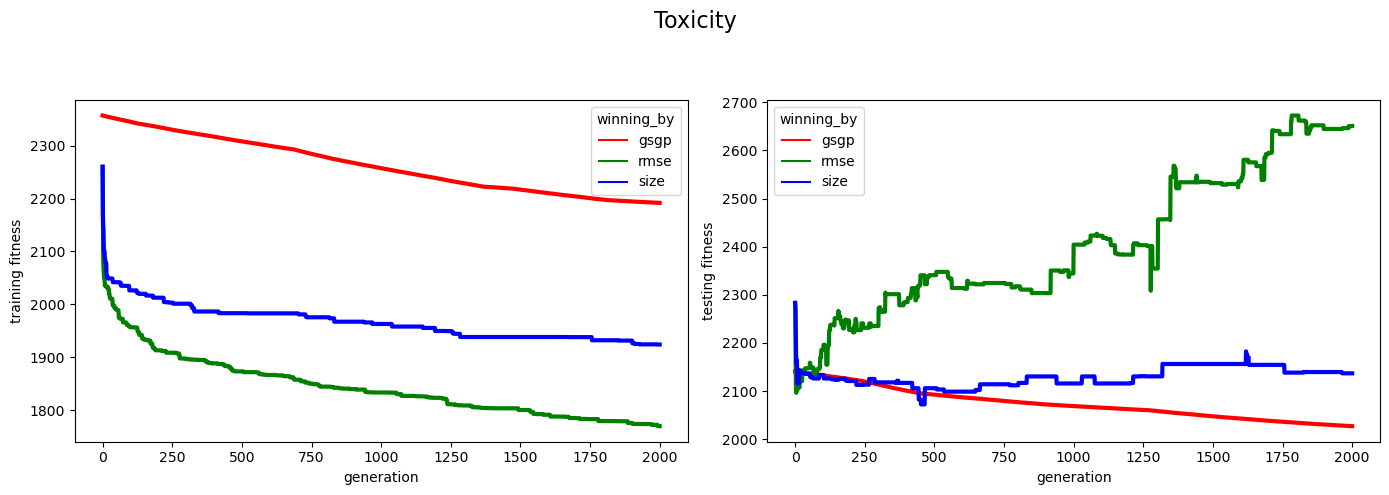

generation  winning_by
0           gsgp          2356.935669
            rmse          2260.133545
            size          2260.133545
1           gsgp          2356.856934
            rmse          2170.665405
                             ...     
1999        rmse          1769.752808
            size          1924.101685
2000        gsgp          2191.850220
            rmse          1769.752808
            size          1924.101685
Name: training_fitness, Length: 6003, dtype: float64
generation  winning_by
0           gsgp          2140.910645
            rmse          2283.136108
            size          2283.136108
1           gsgp          2140.883301
            rmse          2271.889038
                             ...     
1999        rmse          2650.819702
            size          2136.879639
2000        gsgp          2027.069519
            rmse          2650.819702
            size          2136.879639
Name: test_fitness, Length: 6003, dtype: float64


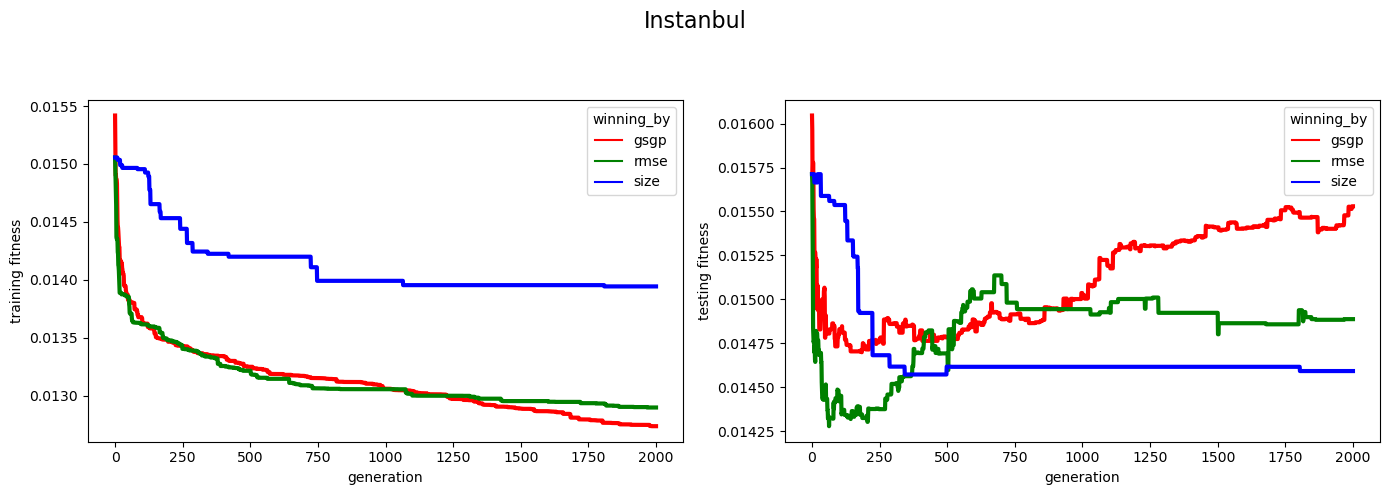

generation  winning_by
0           gsgp          0.015418
            rmse          0.015056
            size          0.015056
1           gsgp          0.015126
            rmse          0.014955
                            ...   
1999        rmse          0.012899
            size          0.013944
2000        gsgp          0.012737
            rmse          0.012899
            size          0.013944
Name: training_fitness, Length: 6003, dtype: float64
generation  winning_by
0           gsgp          0.016046
            rmse          0.015712
            size          0.015712
1           gsgp          0.015964
            rmse          0.015665
                            ...   
1999        rmse          0.014887
            size          0.014591
2000        gsgp          0.015529
            rmse          0.014887
            size          0.014591
Name: test_fitness, Length: 6003, dtype: float64


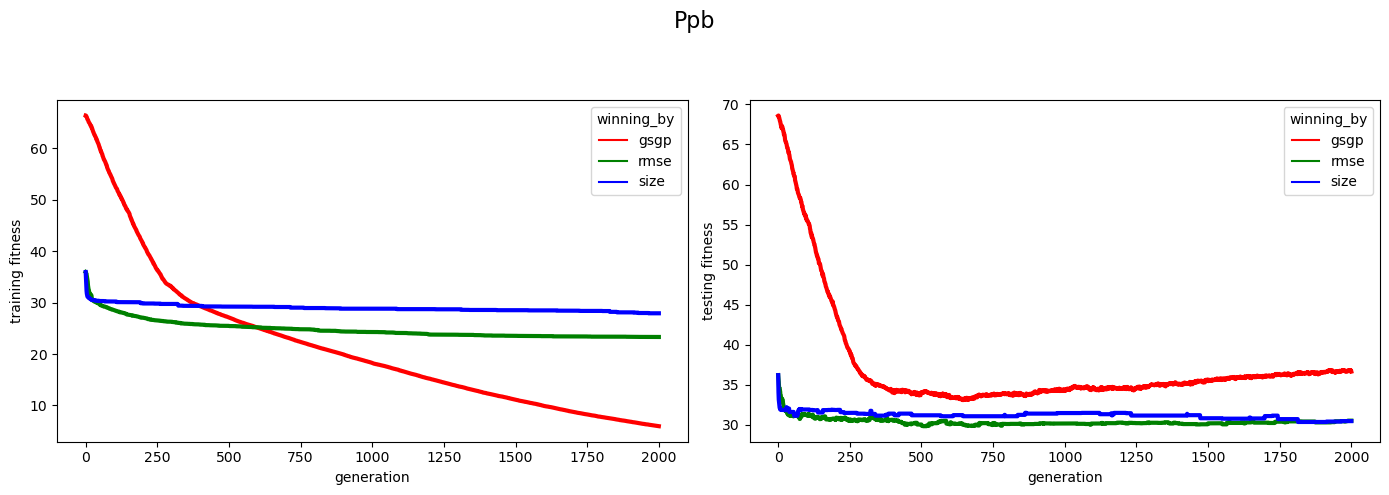

generation  winning_by
0           gsgp          66.367832
            rmse          35.941204
            size          35.941204
1           gsgp          66.349041
            rmse          35.897827
                            ...    
1999        rmse          23.315084
            size          27.919437
2000        gsgp           5.969181
            rmse          23.315084
            size          27.919437
Name: training_fitness, Length: 6003, dtype: float64
generation  winning_by
0           gsgp          68.588398
            rmse          36.203915
            size          36.203915
1           gsgp          68.615765
            rmse          35.849440
                            ...    
1999        rmse          30.519578
            size          30.464413
2000        gsgp          36.648111
            rmse          30.519578
            size          30.464413
Name: test_fitness, Length: 6003, dtype: float64


In [3]:
for dataset in ["energy", "concrete", "resid_build_sale_price", "toxicity","instanbul", "ppb"]:
    
    # getting the names of the loggers both for rmse and for size
    logger_names = [f"final_{dataset}-rmse.csv", f"final_{dataset}-size.csv", "gsgp.csv"]

    results = []
    for result in logger_names:
        if result == "gsgp.csv":
            gsgp =  get_experiment_results(experiment_id=None, logger_name="gsgp.csv")
            gsgp = gsgp[gsgp.dataset == dataset]
            gsgp['log_level'] = gsgp['seed'].map(lambda x: 1)
            gsgp["winning_by"] = gsgp['seed'].map(lambda x: "gsgp")
            results.append(gsgp)
        else:
            r = get_experiment_results(experiment_id=-1, logger_name=result)
            r['log_level'] = r['seed'].map(lambda x: 1)
            r["winning_by"] = r['seed'].map(lambda x: result.split("-")[-1].split(".")[0])
            r['dataset'] = r['dataset'].map(lambda x: dataset)
            
            results.append(r)



    final = pd.concat(results, axis = 0)

    location =  os.path.join(os.getcwd().split("utils")[0],"log")

    final.to_csv(os.path.join(location, f"{dataset}_full.csv"), header=False,  index=False)
    
    show_results(x_var = "generation", y_var="training_fitness", experiment_id=None, logger_name=f"{dataset}_full.csv",
             log_level=1, dataset=None, winning_by=True)

In [ ]:
# getting the names of the loggers both for rmse and for size
logger_names = [f"final_{dataset}-rmse.csv", f"final_{dataset}-size.csv", "gsgp.csv"]

results = []
for result in logger_names:
    if result == "gsgp.csv":
        gsgp =  get_experiment_results(experiment_id=None, logger_name="gsgp.csv")
        gsgp = gsgp[gsgp.dataset == dataset]
        gsgp['log_level'] = gsgp['seed'].map(lambda x: 1)
        gsgp["winning_by"] = gsgp['seed'].map(lambda x: "gsgp")
        results.append(gsgp)
    else:
        r = get_experiment_results(experiment_id=-1, logger_name=result)
        r['log_level'] = r['seed'].map(lambda x: 1)
        r["winning_by"] = r['seed'].map(lambda x: result.split("-")[-1].split(".")[0])
        results.append(r)
        
    

final = pd.concat(results, axis = 0)

location =  os.path.join(os.getcwd().split("utils")[0],"log")

final.to_csv(os.path.join(location, f"{dataset}_full.csv"), header=False,  index=False)


In [ ]:
show_results(x_var = "generation", y_var="training_fitness", experiment_id=None, logger_name="concrete_full.csv",
             log_level=1, dataset=None, winning_by=True)

In [ ]:
get_experiment_results(experiment_id=None, logger_name="gsgp.csv").dataset.unique()

## Merging datasets


In [ ]:
a = get_experiment_results(experiment_id=-1, logger_name="concrete/c1.csv")

b = get_experiment_results(experiment_id=-1, logger_name="concrete/c2.csv")

c = get_experiment_results(experiment_id=-1, logger_name="concrete/c3.csv")

final = pd.concat([a,b,c])
final['log_level'] = final.seed.map(lambda x: 1)


final.to_csv("FINAL_CONCRETE.csv", header=False,  index=False)

In [ ]:
a = get_experiment_results(experiment_id=-1, logger_name="LR_slim.csv")
a["algo"] = a.algo.map(lambda x: "SlimGSGP_1_sum")

b = get_experiment_results(experiment_id=-1, logger_name="davide_istanbul_slim_mul1_fixed.csv")
b["algo"] = b.algo.map(lambda x: "SlimGSGP_1_mul")

c = get_experiment_results(experiment_id=-1, logger_name="diogo_slim_plus_two_logger_(1).csv")
c["algo"] = c.algo.map(lambda x: "SlimGSGP_2_sum")

d = get_experiment_results(experiment_id=-1, logger_name="LR_slim_fixed.csv")
d["algo"] = d.algo.map(lambda x: "SlimGSGP_2_mul")

e = get_experiment_results(experiment_id=-1, logger_name="davide_gsgp_istanbul.csv")
e
final = pd.concat([a,b,c, d, e])
final['log_level'] = final.seed.map(lambda x: 1)


final.to_csv("new_instanbul_fixed.csv", header=False,  index=False)


In [ ]:
a = get_experiment_results(experiment_id=None, logger_name="slim.csv")
a = a[(a['dataset'] == 'concrete') & (a['algo'] == "SlimGSGP_2_mul_False")]

b = get_experiment_results(experiment_id=None, logger_name="slim_diogo_concrete.csv")

c = get_experiment_results(experiment_id=None, logger_name="sum_slim.csv")

final = pd.concat([a,b,c])
final['log_level'] = final.seed.map(lambda x: 1)

final.to_csv("slim_concrete_new_final.csv", header=False,  index=False)


In [ ]:
a

In [ ]:
show_results(x_var = "generation", y_var="nodes_count", experiment_id=None, logger_name="new_instanbul_fixed.csv",
             log_level=1, dataset=None)

In [ ]:
ws = open('elite_looks.txt', 'r')
for line in ws:
    print(line)

### extra stuff for later

In [ ]:
""" RESID

df1 = get_experiment_results(experiment_id=None, logger_name="diogo3.csv") # all 30 seeds

df2 = get_experiment_results(experiment_id=None, logger_name="diogo.csv") # all 30 seeds
df2 = df2[df2.dataset == "resid_build_sale_price"]

df3 = get_experiment_results(experiment_id=None, logger_name="diogo2.csv") # all 30 seeds

df4 = get_experiment_results(experiment_id=None, logger_name="davide.csv") # seed 0 till 6
df4 = df4[df4.seed <= 6] 

df5 = get_experiment_results(experiment_id=None, logger_name="liah2.csv") # seed 7 till 30


final = pd.concat([df1,df2, df3, df4, df5])

for s in range(30):
    for al in final.algo.unique():
        print(f'Seed {s} + Algo {al} ==> {len(final[(final.algo == al) & (final.seed == s)])}')
        
final['log_level'] = final.seed.map(lambda x: 1)
final.to_csv("resid_final.csv", header=False,  index=False)



"""

In [ ]:
""" TOXICITY

df_mul = get_experiment_results(experiment_id=None, logger_name="liah_mul_logger.csv")
df_mul = df_mul[df_mul.dataset == "toxicity"]

df_s = get_experiment_results(experiment_id=None, logger_name="liah_sum_logger.csv")
df_s = df_s[df_s.dataset == "toxicity"]


fari = get_experiment_results(experiment_id=None, logger_name="diogo_slim_plus_one_logger_.csv")
fari = fari[fari.dataset == "toxicity"]

farid = get_experiment_results(experiment_id=None, logger_name="davide_toxicity_+1.csv")
farid = farid[farid.dataset == "toxicity"]
farid = farid[~farid.seed.isin(fari.seed.unique())]
fari_final = pd.concat([fari, farid])
diogo = get_experiment_results(experiment_id=None, logger_name="diogo_slim_logger.csv")

gp = get_experiment_results(experiment_id=None, logger_name="diogo_gp_logger.csv")

gsgp = get_experiment_results(experiment_id=None, logger_name="liah_gsgp.csv")
gsgp = gsgp[gsgp.dataset == "toxicity"]

final = pd.concat([diogo, fari_final, df_mul, df_s, gsgp, gp])
final['log_level'] = final.seed.map(lambda x: 1)


final.to_csv("toxicity_final.csv", header=False,  index=False)

"""

In [ ]:
""" PPB

d = get_experiment_results(experiment_id=None, logger_name="diogo_logger.csv")
mul1 = d[d.dataset== "ppb"]

d = get_experiment_results(experiment_id=None, logger_name="davide_logger2.csv")
plus1 = d[d.dataset == "ppb"]

d = get_experiment_results(experiment_id=None, logger_name="liah_logger.csv")

mul2 = d[(d.dataset=="ppb") & (d.algo == 'SlimGSGP_2_mul.csv' )]
sum2 = d[(d.dataset=="ppb") & (d.algo == 'SlimGSGP_2_sum.csv' )]

final = pd.concat([mul1,plus1, mul2, sum2])


final['log_level'] = final.seed.map(lambda x: 1)
final.to_csv("ppb_final.csv", header=False,  index=False)

for s in range(30):
    for al in final.algo.unique():
        print(f'Seed {s} + Algo {al} ==> {len(final[(final.algo == al) & (final.seed == s)])}')
        


"""

In [ ]:
""" TOXICITY MODIFIED
gp = get_experiment_results(experiment_id=None, logger_name="diogo_gp_logger.csv")

gsgp = get_experiment_results(experiment_id=None, logger_name="liah_gsgp.csv")
gsgp = gsgp[gsgp.dataset == "toxicity"]
tox = get_experiment_results(experiment_id=None, logger_name="LR_slim.csv")
tox = tox[tox.dataset=="toxicity"]
mul2 = tox[tox.algo == 'SlimGSGP_2_mul']
tox = tox[tox.experiment_id != "851e6ca8-f15b-11ee-a444-badda4640570"]
final_tox = pd.concat([tox, mul2, gp, gsgp])
final_tox['log_level'] = final_tox.seed.map(lambda x: 1)
final_tox.to_csv("tox_modified_final.csv", header=False,  index=False)
"""

In [ ]:
# dataset checker:
for s in range(30):
    for al in final.algo.unique():
        print(f'Seed {s} + Algo {al} ==> {len(final[(final.algo == al) & (final.seed == s)])}')


In [ ]:
# df["pop_fitnesses"].map(lambda x: torch.tensor([float(val.split("tensor(")[-1][:-1]) for val in x.split()]))

In [ ]:
df_mul = get_experiment_results(experiment_id=None, logger_name="liah_mul_logger.csv")
df_mul = df_mul[df_mul.dataset == "toxicity"]

df_s = get_experiment_results(experiment_id=None, logger_name="liah_sum_logger.csv")
df_s = df_s[df_s.dataset == "toxicity"]


fari = get_experiment_results(experiment_id=None, logger_name="diogo_slim_plus_one_logger_.csv")
fari = fari[fari.dataset == "toxicity"]

In [ ]:
farid = get_experiment_results(experiment_id=None, logger_name="davide_toxicity_+1.csv")
farid = farid[farid.dataset == "toxicity"]
farid = farid[~farid.seed.isin(fari.seed.unique())]
fari_final = pd.concat([fari, farid])
diogo = get_experiment_results(experiment_id=None, logger_name="diogo_slim_logger.csv")

In [ ]:
final = pd.concat([diogo, fari, df_mul, df_s])
final['log_level'] = final.seed.map(lambda x: 1)
final.to_csv("final.csv", header=False,  index=False)

In [ ]:
a = "StandardGP,fa2d9f34-ea10-11ee-a0ac-18c04d6299ac,toxicity,0,0,2204.756591796875,0.17503881454467773,1554.0,1993.7264404296875,1"

In [ ]:
class example():
    def __init__(self):
        self.fit = 10
        self.other = False
        
    def __repr__(self):
        return str(self.fit)
    
    def __lt__(self):
        return self.fit + 10

    e = example()

int(e) * 10

In [ ]:
e